In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [9]:
data_folder = os.path.join(os.getcwd(), os.pardir, 'data')
df = pd.read_csv(data_folder+'\\vlcc_fleet_utilisation_q1_q2_2025.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Vessel_ID     300 non-null    object        
 1   Vessel_Name   300 non-null    object        
 2   Date          300 non-null    datetime64[ns]
 3   Region        300 non-null    object        
 4   Route         300 non-null    object        
 5   DWT           300 non-null    int64         
 6   Status        300 non-null    object        
 7   Idle_Days     300 non-null    int64         
 8   Loaded_Days   300 non-null    int64         
 9   Ballast_Days  300 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 23.6+ KB


In [11]:
print("Number of null values:")
df.isna().sum()

Number of null values:


Vessel_ID       0
Vessel_Name     0
Date            0
Region          0
Route           0
DWT             0
Status          0
Idle_Days       0
Loaded_Days     0
Ballast_Days    0
dtype: int64

In [12]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [13]:
df['Total_Days'] = df['Idle_Days'] + df['Loaded_Days'] + df['Ballast_Days']
df['Utilisation (%)'] = df['Loaded_Days']*100/df['Total_Days']
df['Origin'] = df['Route'].str.split('-').str[0]
df['Destination'] = df['Route'].str.split('-').str[1]
df = df.reindex(columns=['Vessel_ID','Vessel_Name','Date','Region','Route','Origin','Destination','DWT','Status','Idle_Days','Loaded_Days','Ballast_Days','Total_Days','Utilisation (%)'])
df['Date'] = df['Date'].dt.to_period('M')
df

,Vessel_ID,Vessel_Name,Date,Region,Route,Origin,Destination,DWT,Status,Idle_Days,Loaded_Days,Ballast_Days,Total_Days,Utilisation (%)
0,VLCC001,Vessel_1,2025-01,North Sea,NS-Asia,NS,Asia,310387,Loaded,8,15,8,31,48.39
1,VLCC001,Vessel_1,2025-02,Caribbean,MEG-China,MEG,China,318565,Loaded,11,15,2,28,53.57
2,VLCC001,Vessel_1,2025-03,Caribbean,NS-Asia,NS,Asia,316009,Loaded,14,16,1,31,51.61
3,VLCC001,Vessel_1,2025-04,MEG,NS-Asia,NS,Asia,296325,Loaded,10,16,4,30,53.33
4,VLCC001,Vessel_1,2025-05,US Gulf,Carib-US East Coast,Carib,US East Coast,295747,Loaded,7,20,4,31,64.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,VLCC050,Vessel_50,2025-02,West Africa,WAF-US Gulf,WAF,US Gulf,292583,Loaded,8,20,0,28,71.43
296,VLCC050,Vessel_50,2025-03,Caribbean,NS-Asia,NS,Asia,291455,Loaded,3,20,8,31,64.52
297,VLCC050,Vessel_50,2025-04,Caribbean,Carib-US East Coast,Carib,US East Coast,310129,Loaded,3,19,8,30,63.33
298,VLCC050,Vessel_50,2025-05,North Sea,NS-Asia,NS,Asia,304294,Loaded,5,21,5,31,67.74


In [14]:
df.describe()

,DWT,Idle_Days,Loaded_Days,Ballast_Days,Total_Days,Utilisation (%)
count,300.00,300.00,300.00,300.00,300.00,300.00
mean,"304,346.19",3.72,22.42,4.03,30.17,74.33
std,"8,394.46",3.43,4.71,3.77,1.07,15.33
min,"290,037.00",0.00,14.00,0.00,28.00,48.39
25%,"297,449.25",1.00,18.00,1.00,30.00,60.71
50%,"303,341.50",3.00,22.00,3.00,30.50,74.19
75%,"311,430.75",6.00,26.00,6.00,31.00,87.10
max,"319,582.00",14.00,31.00,15.00,31.00,100.00


In [15]:
df.describe(include=['object'])

,Vessel_ID,Vessel_Name,Region,Route,Origin,Destination,Status
count,300,300,300,300,300,300,300
unique,50,50,5,5,5,5,1
top,VLCC001,Vessel_1,MEG,NS-Asia,NS,Asia,Loaded
freq,6,6,76,63,63,63,300


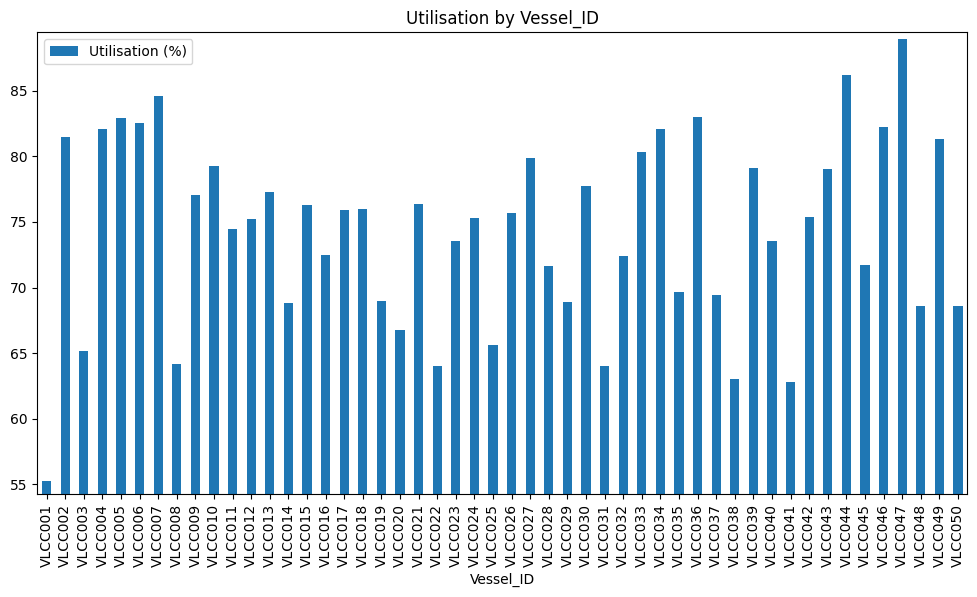

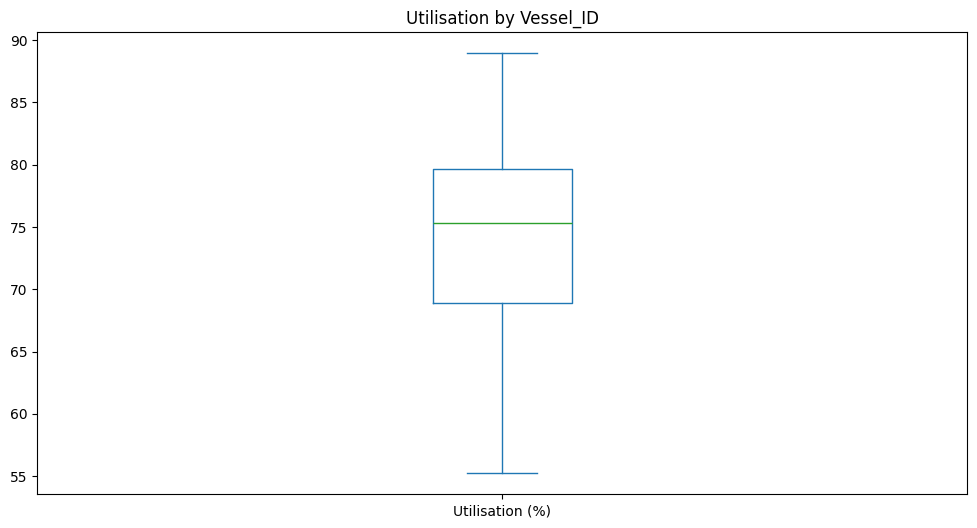

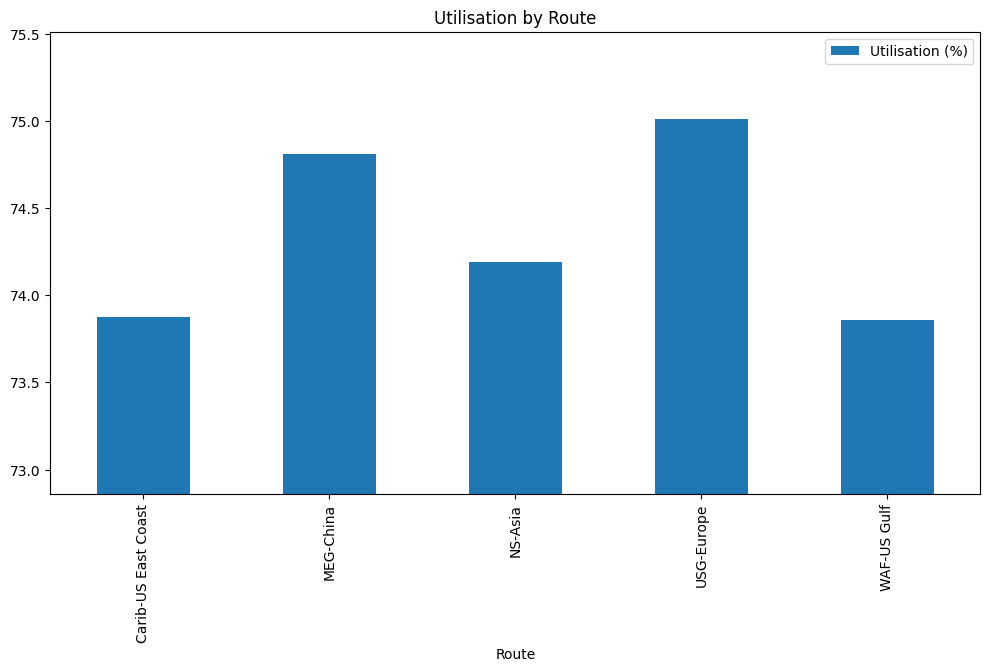

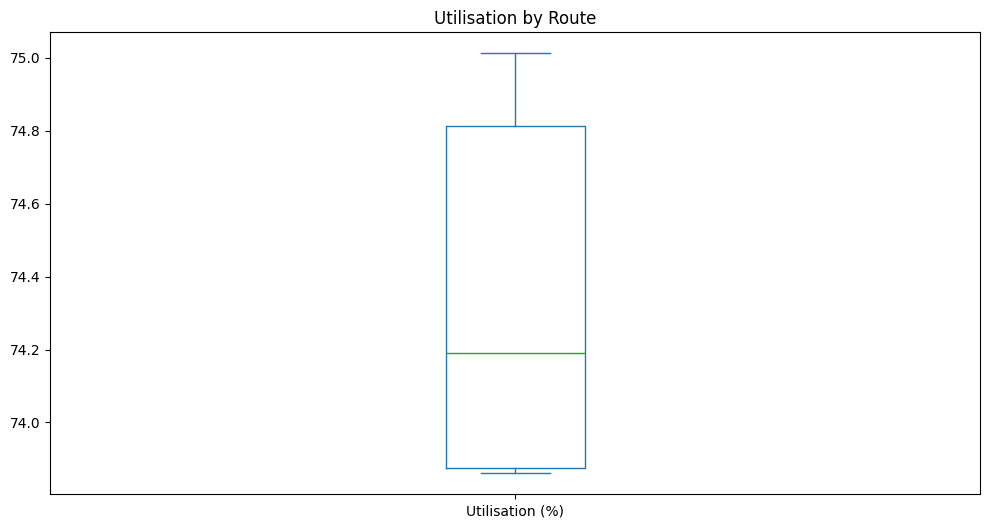

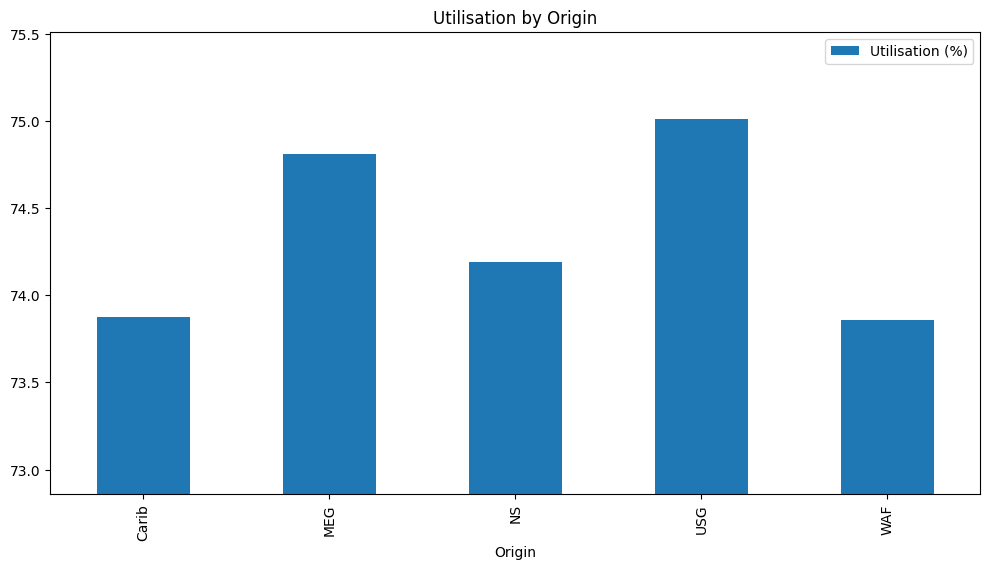

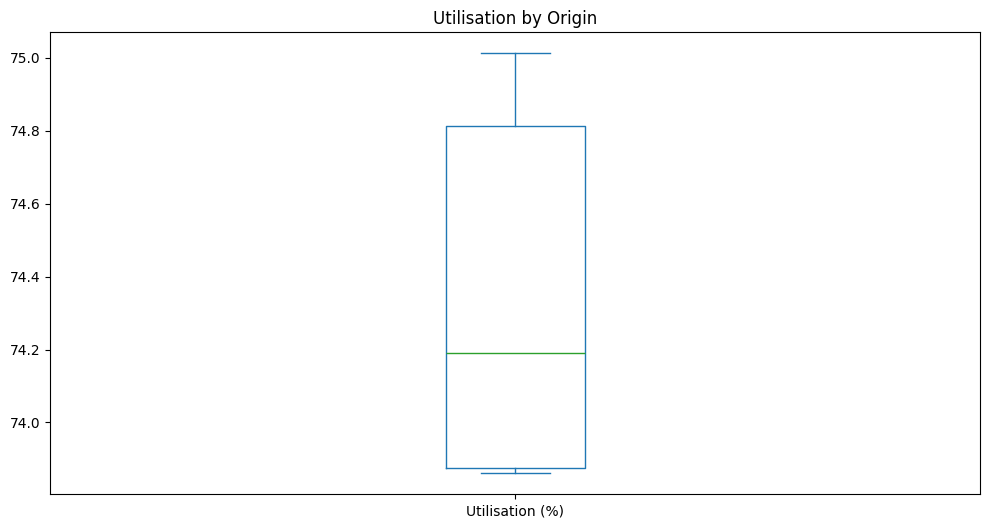

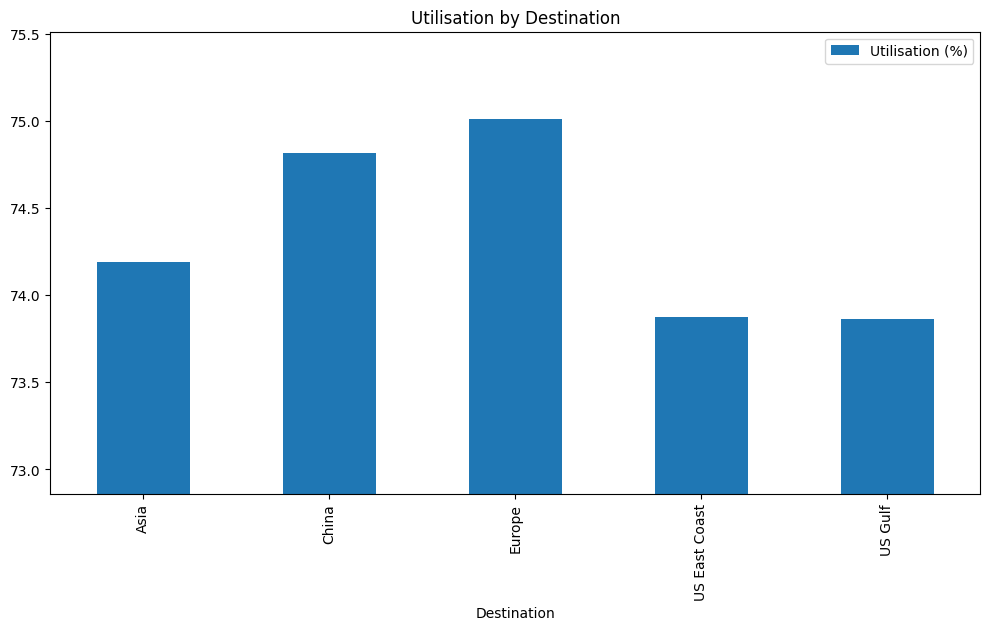

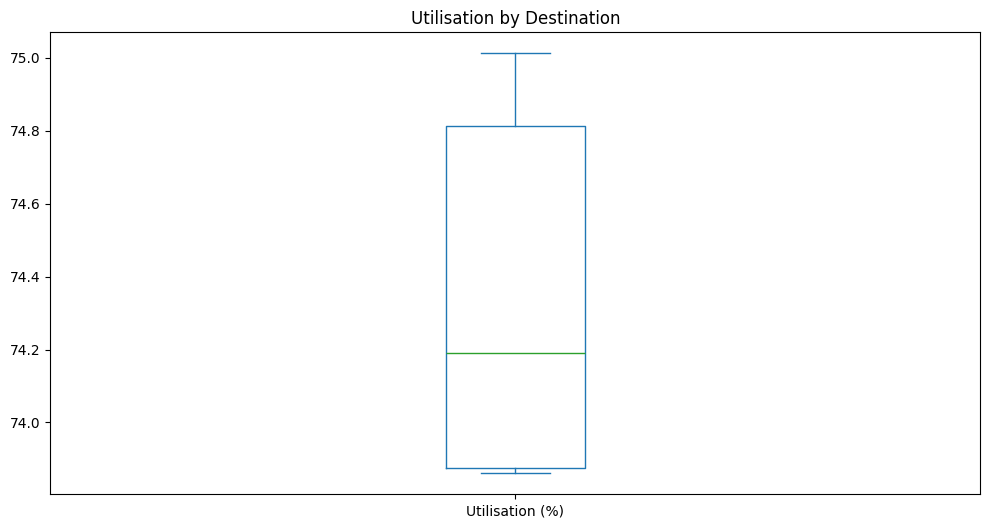

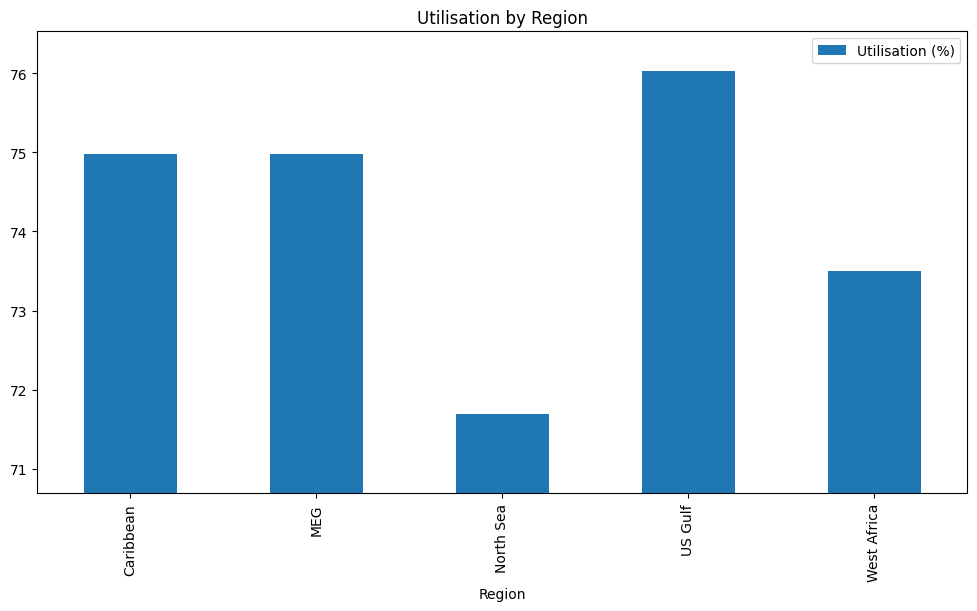

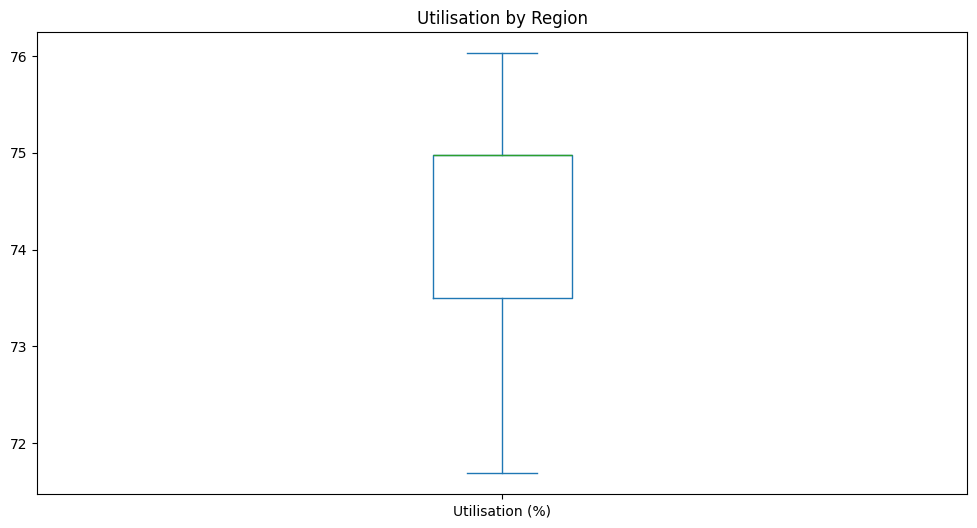

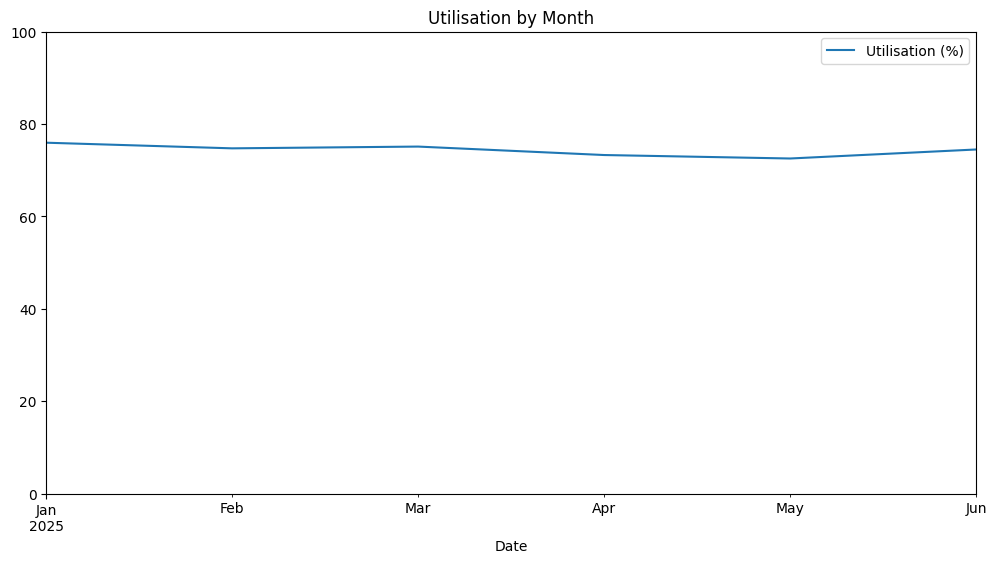

In [16]:
utilisation_columns = ['Vessel_ID','Route','Origin','Destination','Region','Date']

for col in utilisation_columns:
    df_temp = df.groupby(col)['Utilisation (%)'].mean().reset_index()
    if col == 'Date':
        df_temp.plot(kind='line', x=col, y='Utilisation (%)', title='Utilisation by Month',figsize=(12,6), ylim=(0,100))
    else:
        df_temp.plot(kind='bar', x=col, y='Utilisation (%)', title=f'Utilisation by {col}',figsize=(12,6), ylim=(df_temp['Utilisation (%)'].min()-1,df_temp['Utilisation (%)'].max()+0.5))
        df_temp.plot(kind='box', x=col, y='Utilisation (%)', title=f'Utilisation by {col}',figsize=(12,6))

In [17]:
by_month_df = df.groupby(df['Date']).agg({
    'Loaded_Days': 'sum',    
    'Idle_Days': 'sum',
    'Ballast_Days': 'sum'
}).reset_index()
by_month_df['Total_Days'] = by_month_df.apply(lambda x: x['Idle_Days']+x['Loaded_Days']+x['Ballast_Days'], axis=1)
by_month_df['Utilisation (%)'] = by_month_df['Loaded_Days']/(by_month_df['Total_Days'])

In [18]:
by_month_df

,Date,Loaded_Days,Idle_Days,Ballast_Days,Total_Days,Utilisation (%)
0,2025-01,1177,162,211,1550,0.76
1,2025-02,1046,206,148,1400,0.75
2,2025-03,1164,187,199,1550,0.75
3,2025-04,1099,169,232,1500,0.73
4,2025-05,1124,190,236,1550,0.73
5,2025-06,1117,201,182,1500,0.74


<Axes: title={'center': 'Vessel Activity Days by Month'}, xlabel='Date', ylabel='Days'>

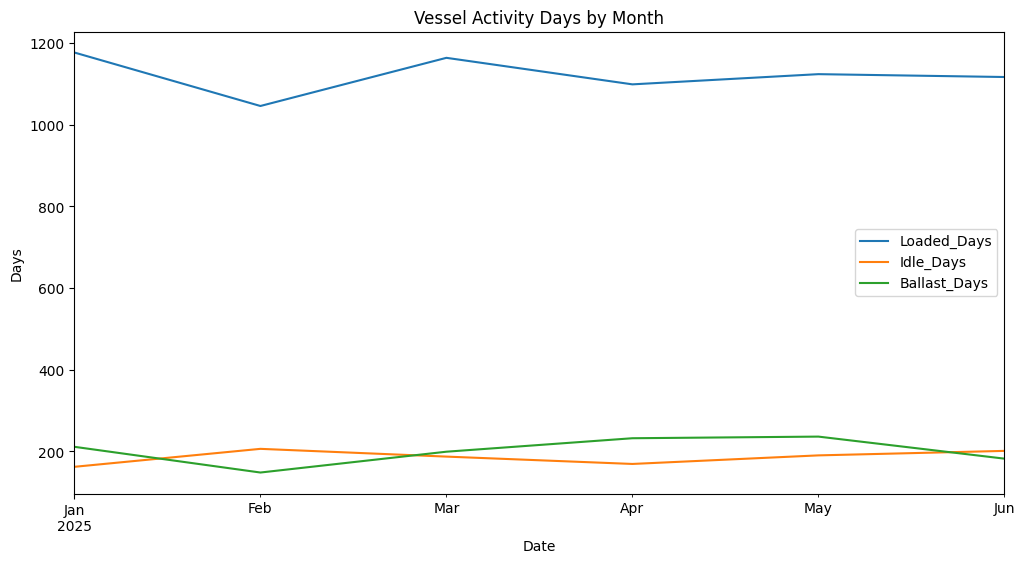

In [19]:
by_month_df[['Loaded_Days','Idle_Days','Ballast_Days','Date']].plot(kind='line',x='Date', ylabel='Days', figsize=(12,6), title='Vessel Activity Days by Month')

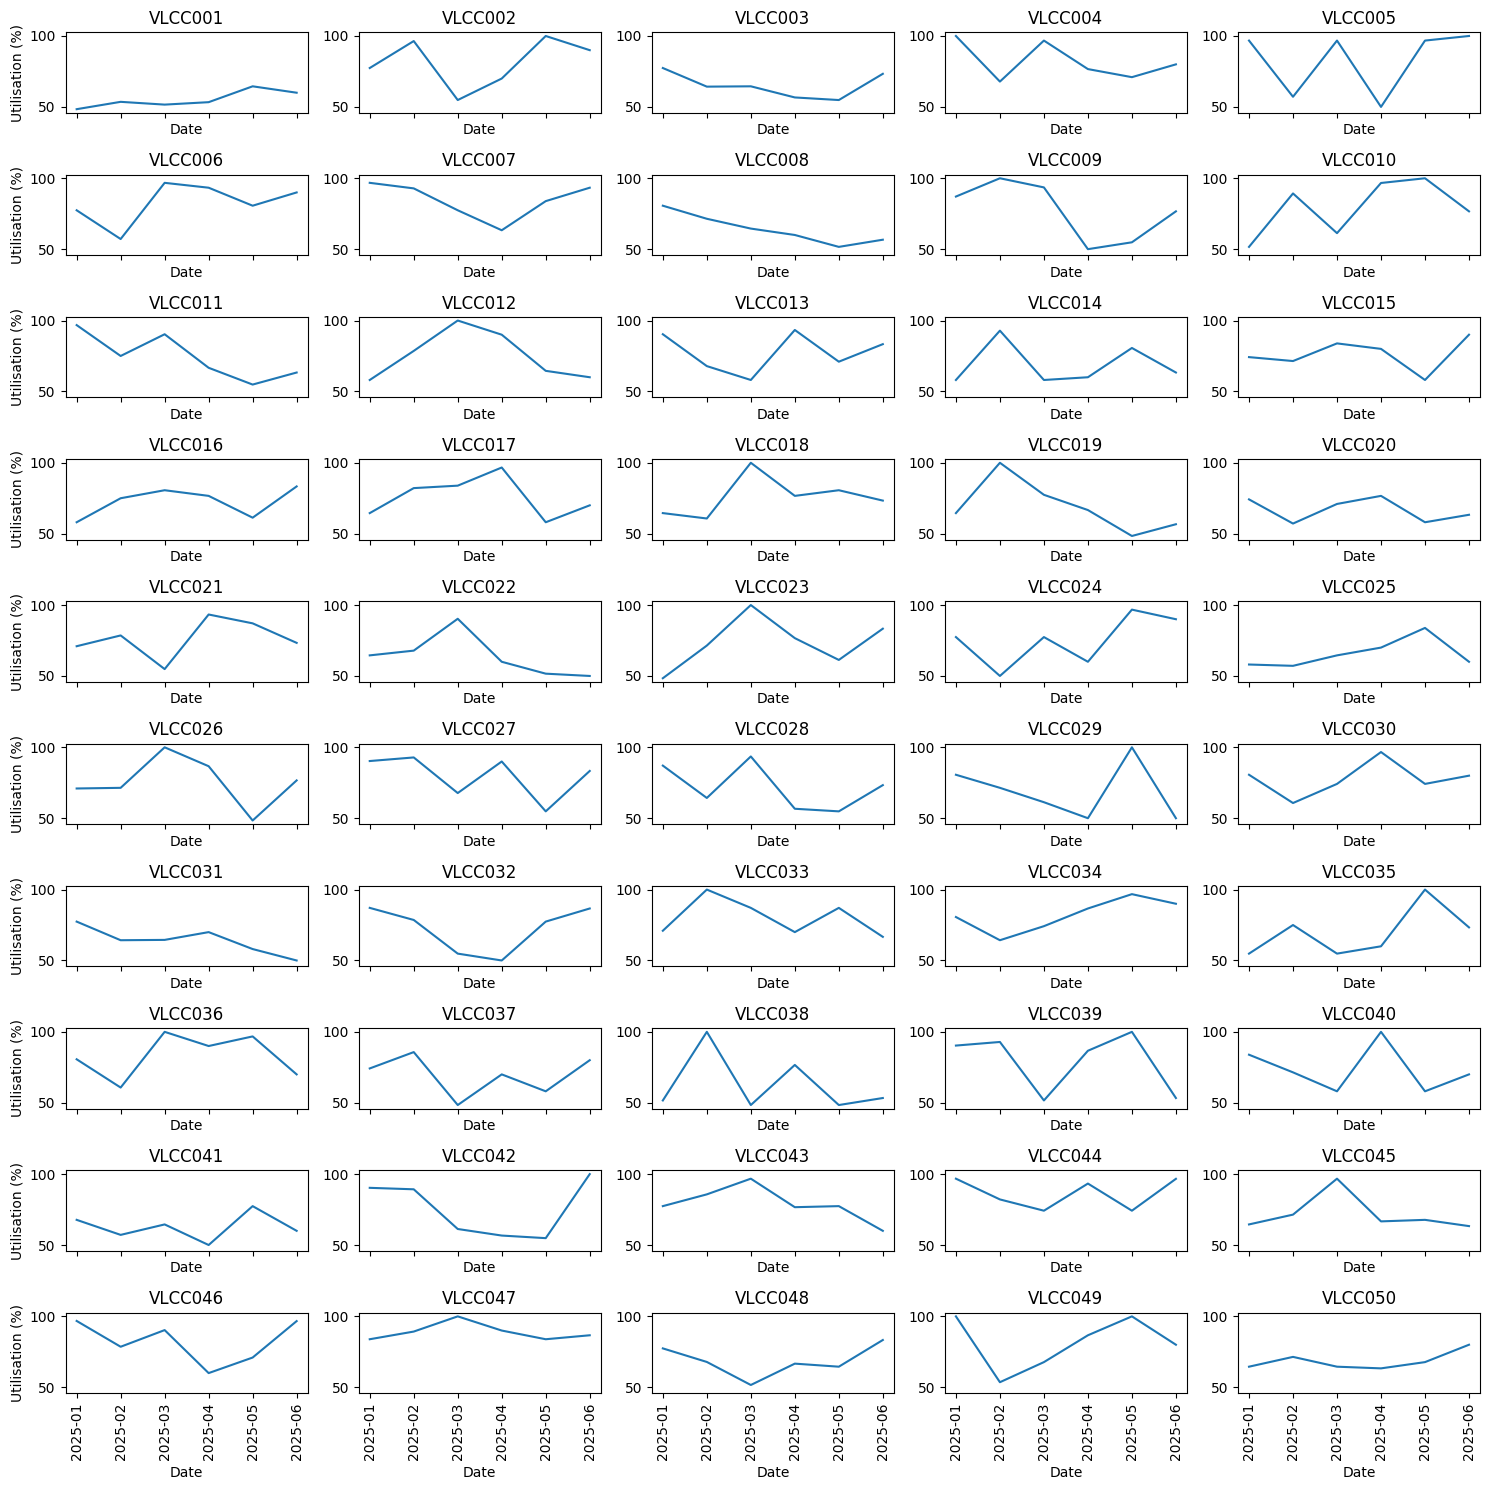

In [20]:
vessels = df['Vessel_ID'].unique()
num_vessels = len(vessels)

rows = 10
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 15), sharex=True, sharey=True)

axes = axes.flatten()

for i, vessel in enumerate(vessels):
    ax = axes[i]
    subset = df[df['Vessel_ID'] == vessel]
    ax.plot(subset['Date'].astype(str), subset['Utilisation (%)'])
    ax.set_title(vessel)
    ax.set_xlabel('Date')
    ax.set_ylabel('Utilisation (%)')
    if i % cols == 0:
        ax.set_ylabel('Utilisation (%)')
    else:
        ax.set_ylabel('')

    ax.tick_params(axis='y', which='both', labelleft=True)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [21]:
vessel_utilisation = df.groupby('Vessel_ID')['Utilisation (%)'].mean().reset_index()
vessel_mean = vessel_utilisation['Utilisation (%)'].mean()
under_threshold = vessel_mean*.875

underperformers = vessel_utilisation[vessel_utilisation['Utilisation (%)']< under_threshold]
underperformers

,Vessel_ID,Utilisation (%)
0,VLCC001,55.24
7,VLCC008,64.14
21,VLCC022,64.05
30,VLCC031,64.05
37,VLCC038,63.06
40,VLCC041,62.80


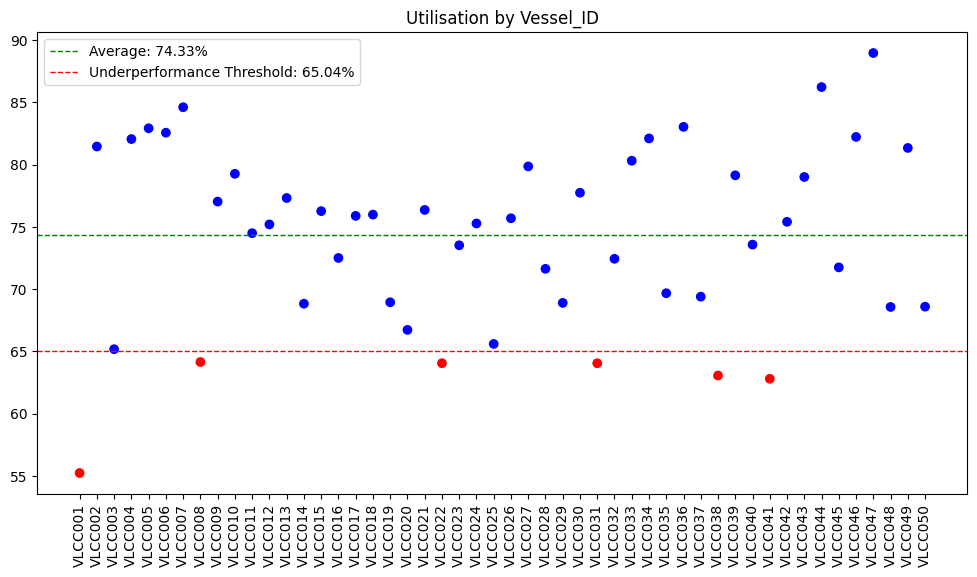

In [22]:
colours = vessel_utilisation['Utilisation (%)'].apply(lambda val: 'red' if val < under_threshold else 'blue')
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(vessel_utilisation['Vessel_ID'], vessel_utilisation['Utilisation (%)'], c=colours)
plt.xticks(rotation=90)
ax.set_title('Utilisation by Vessel_ID')

ax.axhline(
    vessel_mean,
    color='green',
    linestyle='--',
    linewidth=1,
    label=f'Average: {vessel_mean:.2f}%'
)

ax.axhline(
    vessel_mean*.875,
    color='red',
    linestyle='--',
    linewidth=1,
    label=f'Underperformance Threshold: {vessel_mean*.875:.2f}%'
)

plt.legend()

plt.show()